## import liabraries

In [55]:
import numpy as np
import pandas as pd

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro, kstest, normaltest #hypothesis testing

from sklearn.model_selection import train_test_split

#linear regression
from sklearn.linear_model import LinearRegression

#evaluation metrics for regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## problem statement

## 2. Data Gathering

In [2]:
df = pd.read_json(r"C:\Users\rohit\Desktop\datasets\iris.json")
df

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 3. EDA (Exploratory Data Analysis)

In [3]:
df.shape 

(150, 5)

In [4]:
# check for information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepalLength  150 non-null    float64
 1   sepalWidth   150 non-null    float64
 2   petalLength  150 non-null    float64
 3   petalWidth   150 non-null    float64
 4   species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# chefor statastical information

df.describe()

,sepalLength,sepalWidth,petalLength,petalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
df["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [8]:
# check for missing values

df.isnull().sum()

sepalLength    0
sepalWidth     0
petalLength    0
petalWidth     0
species        0
dtype: int64

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepalWidth'>

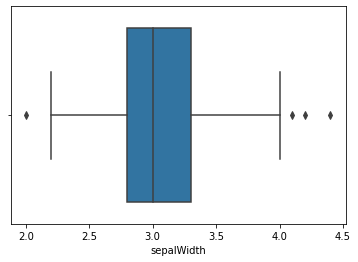

In [9]:
# check for outliers

sns.boxplot(df["sepalWidth"])

In [10]:
q1 = df["sepalWidth"].quantile(0.25)
q2 = df["sepalWidth"].quantile(0.50)
q3 = df["sepalWidth"].quantile(0.75)

iqr = q3-q1

lower_tail = q1-1.5*iqr
upper_tail = q3+1.5*iqr

In [11]:
lower_tail

2.05

In [12]:
upper_tail

4.05

In [13]:
df[df["sepalWidth"] < lower_tail ]

,sepalLength,sepalWidth,petalLength,petalWidth,species
60,5.0,2.0,3.5,1.0,versicolor


In [14]:
df[df["sepalWidth"] > upper_tail]

,sepalLength,sepalWidth,petalLength,petalWidth,species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='petalLength'>

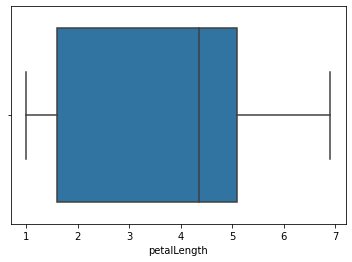

In [15]:
sns.boxplot(df["petalLength"])

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='petalWidth'>

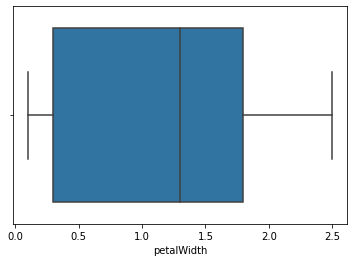

In [16]:
sns.boxplot(df["petalWidth"])

<AxesSubplot:xlabel='petalLength', ylabel='Density'>

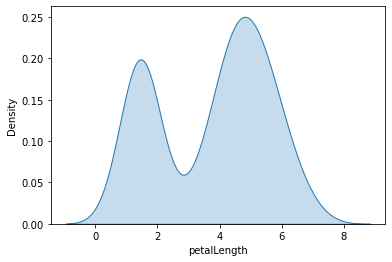

In [17]:
# visualization

sns.kdeplot(df["petalLength"], fill = True)

<AxesSubplot:xlabel='sepalWidth', ylabel='Count'>

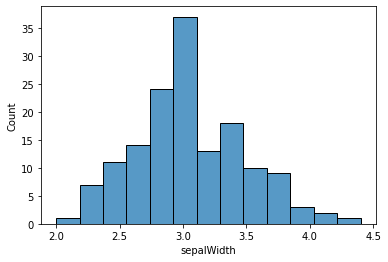

In [18]:
sns.histplot(df["sepalWidth"])

<AxesSubplot:xlabel='petalWidth', ylabel='Density'>

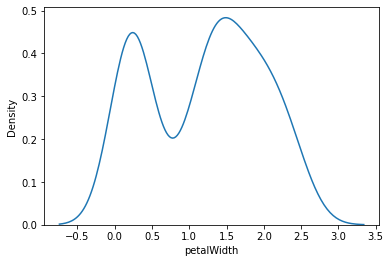

In [19]:
sns.kdeplot(df["petalWidth"])

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='species', ylabel='count'>

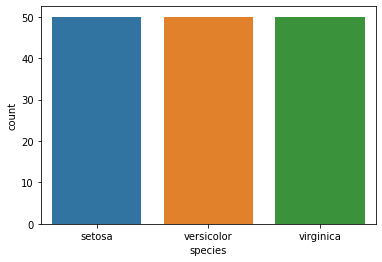

In [20]:
sns.countplot(df["species"])

## 4. Feature Engineering

In [42]:
# convert whole data into numerical format

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepalLength  150 non-null    float64
 1   sepalWidth   150 non-null    float64
 2   petalLength  150 non-null    float64
 3   petalWidth   150 non-null    float64
 4   species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [21]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [22]:
df["species"].replace({'setosa':0, 'versicolor':1, 'virginica':2},inplace=True)

In [23]:
df

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 5. Feature Selection

### Assumption 1. Linearity

In [24]:
# correlation
df.corr()

,sepalLength,sepalWidth,petalLength,petalWidth,species
sepalLength,1.000000,-0.117570,0.871754,0.817941,0.782561
sepalWidth,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petalLength,0.871754,-0.428440,1.000000,0.962865,0.949035
petalWidth,0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:>

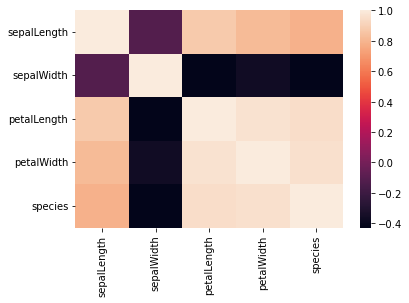

In [25]:
sns.heatmap(df.corr())

<AxesSubplot:>

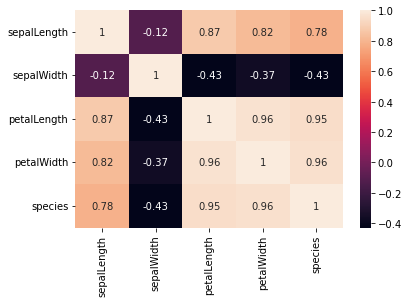

In [26]:
sns.heatmap(df.corr(), annot=True) #annot : to display number on heatmap

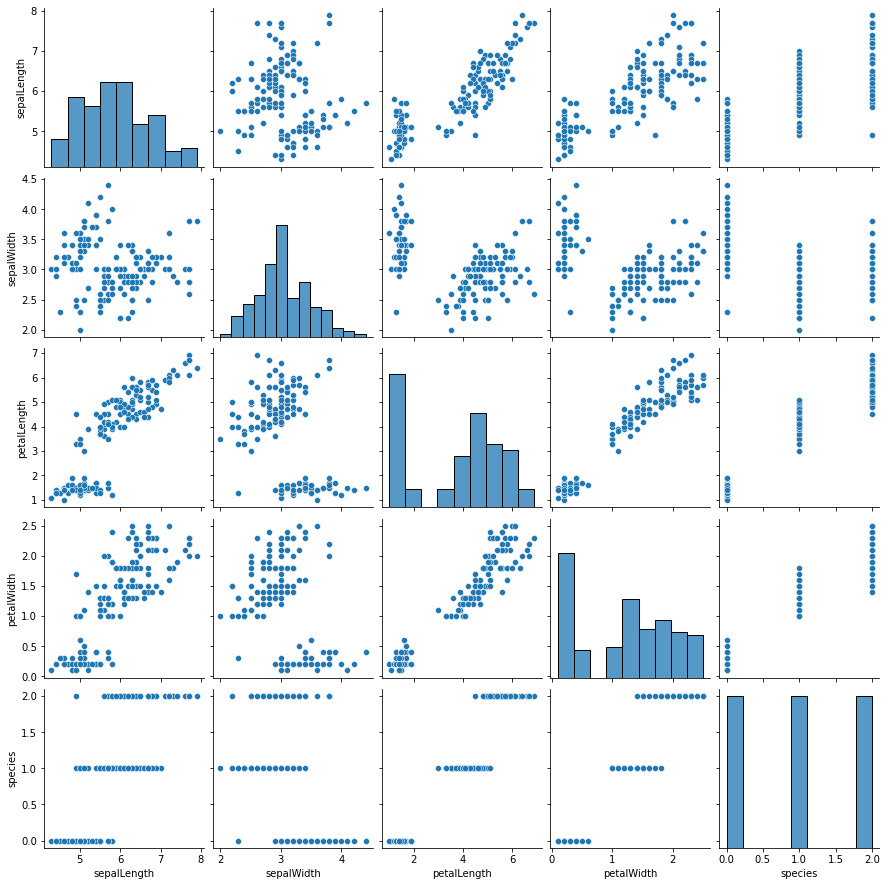

In [51]:
## pairplot

sns.pairplot(df)

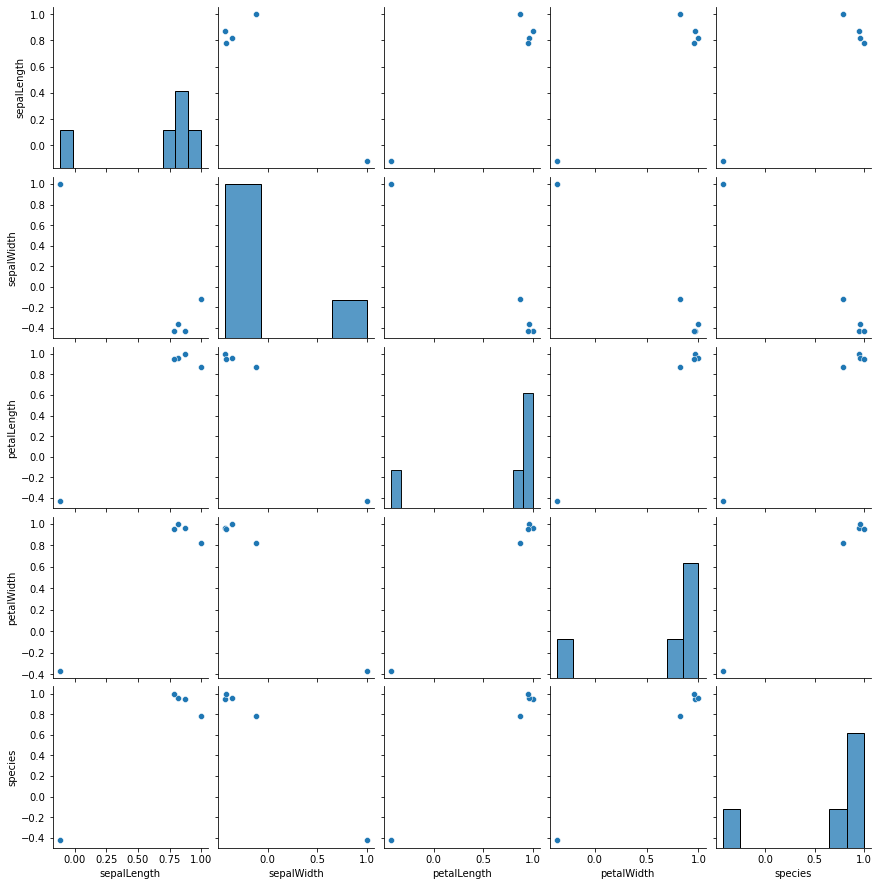

In [52]:
sns.pairplot(df.corr())

  ### Assumption 2. No Multicolinearity

In [27]:
df1 = df.iloc[:,1:]
df1

,sepalWidth,petalLength,petalWidth,species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0
...,...,...,...,...
145,3.0,5.2,2.3,2
146,2.5,5.0,1.9,2
147,3.0,5.2,2.0,2
148,3.4,5.4,2.3,2


In [28]:
vif_df = pd.DataFrame()
vif_df["Features"] = df1.columns

vif_df

,Features
0,sepalWidth
1,petalLength
2,petalWidth
3,species


In [29]:
vif_list = []

for i in range(df1.shape[1]):
    vif = variance_inflation_factor(df1.to_numpy(),i)
    vif_list.append(vif)

In [30]:
vif_list

[8.658996961562709, 69.86836735290225, 62.602076700773566, 35.0031533037486]

In [31]:
vif_df["VIF"] = vif_list

vif_df

,Features,VIF
0,sepalWidth,8.658997
1,petalLength,69.868367
2,petalWidth,62.602077
3,species,35.003153


In [32]:
x = df.iloc[:,1:] #independat features

y = df["sepalLength"] #dependant features/target column

In [33]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [34]:
xtrain.shape

(120, 4)

In [35]:
ytrain.shape

(120,)

In [36]:
xtest.shape

(30, 4)

In [37]:
ytest.shape

(30,)

## 5. Model Training

In [38]:
lin_reg = LinearRegression()

lin_reg

LinearRegression()

In [39]:
lin_reg_model = lin_reg.fit(xtrain,ytrain) #BFL, minimum values of m,c,cf
lin_reg_model

LinearRegression()

### Assumption 3 : Normality of residual

In [40]:
ytrain

97     6.2
17     5.1
54     6.5
134    6.1
67     5.8
      ... 
29     4.7
93     5.0
32     5.2
116    6.5
149    5.9
Name: sepalLength, Length: 120, dtype: float64

In [41]:
ytrain_predict = lin_reg_model.predict(xtrain)

In [42]:
ytrain_predict

array([6.09485438, 4.96666926, 6.1844444 , 6.5339221 , 5.92300206,
       6.37351724, 5.11361748, 5.56584078, 6.24920499, 5.6062614 ,
       6.12018901, 6.46076445, 5.69941115, 6.35003833, 4.61477584,
       5.6093906 , 5.58819381, 5.87902172, 5.62696697, 6.2635775 ,
       6.37181323, 5.45569278, 5.91694782, 6.6716122 , 5.88990917,
       6.57426392, 4.90198335, 5.52926284, 5.79846343, 5.50237179,
       6.03963073, 6.49513082, 5.40487592, 6.60522227, 4.94133463,
       6.80874229, 5.12435734, 6.19889158, 6.48566856, 4.93820543,
       6.76583128, 6.21710676, 4.73326023, 6.3676147 , 5.00914975,
       5.38744713, 5.80344835, 5.06757727, 6.17355695, 5.20783656,
       5.08935217, 7.69740756, 6.36092578, 6.65403582, 7.16020518,
       5.01676041, 4.60388839, 5.0137788 , 5.48001876, 6.63688997,
       4.67946176, 4.89109589, 4.73326023, 5.31607229, 6.66385394,
       6.87136834, 6.03963073, 5.7102986 , 5.72075552, 6.46140325,
       6.32157449, 5.34809585, 5.00289135, 6.46353779, 5.01377

In [43]:
residual = ytrain - ytrain_predict
residual

97     0.105146
17     0.133331
54     0.315556
134   -0.433922
67    -0.123002
         ...   
29    -0.259980
93    -0.059671
32    -0.302802
116   -0.072204
149   -0.369911
Name: sepalLength, Length: 120, dtype: float64

<AxesSubplot:xlabel='sepalLength', ylabel='Density'>

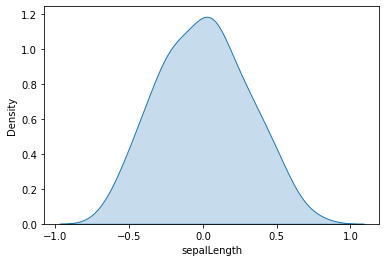

In [44]:
sns.kdeplot(residual,fill=True)

<AxesSubplot:xlabel='sepalLength', ylabel='Count'>

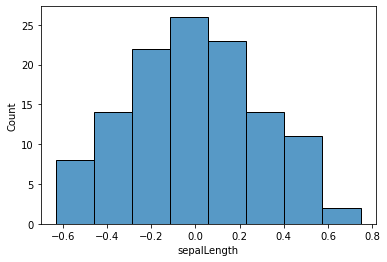

In [45]:
sns.histplot(residual)

#### hypothesis testing

In [53]:
stats, p_val = shapiro(residual)
print(stats,p_val)

if p_val>=0.05:
    print("DATA is normally distributed")
    print("Null hypothesis H0 is true")
    
    
else:
    print("Data is not normally distributed")
    print("alternative hypothesis H1 is true")

0.9906942248344421 0.5976805090904236
DATA is normally distributed
Null hypothesis H0 is true


#### Assumption 4 : Homoscadasticity

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepalLength', ylabel='sepalLength'>

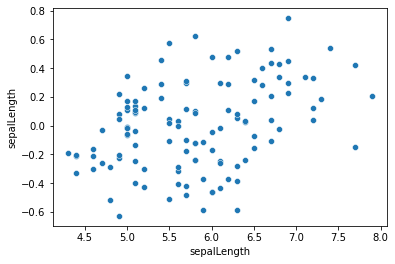

In [54]:
sns.scatterplot(ytrain, residual)

## 6. Model Evaluation

### Model evaluation for training

In [57]:
mse = mean_squared_error(ytrain,ytrain_predict)
print(f"Mean Squared error : {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared error : {rmse}")

mae = mean_absolute_error(ytrain,ytrain_predict)
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytrain,ytrain_predict)
print(f"R2 score : {r2score}")

Mean Squared error : 0.08831572514633207
Root Mean Squared error : 0.29717961764954887
Mean Absolute error : 0.24349836990298482
R2 score : 0.8645117998266447


### Model evaluation for testing

In [58]:
ytest

48     5.3
20     5.4
73     6.1
80     5.5
135    7.7
30     4.8
119    6.0
66     5.6
50     7.0
56     6.3
41     4.5
86     6.7
5      5.4
105    7.6
77     6.7
128    6.4
12     4.8
123    6.3
115    6.4
74     6.4
147    6.5
45     4.8
3      4.6
96     5.7
84     5.4
146    6.3
118    7.7
108    6.7
111    6.4
81     5.5
Name: sepalLength, dtype: float64

In [59]:
ytest_predict = lin_reg_model.predict(xtest)
ytest_predict

array([5.20783656, 5.16492555, 6.36868403, 5.46600211, 6.84453384,
       4.89529442, 5.78551611, 6.23824287, 6.55498353, 6.54722528,
       4.11486488, 6.45407553, 5.41591096, 7.29484487, 6.54366555,
       6.40973933, 4.71568385, 5.92470607, 6.36931871, 6.09485438,
       6.27303976, 4.64323967, 4.81972105, 6.01928101, 6.23824287,
       5.83468552, 7.19037714, 6.47549457, 6.19077747, 5.42665083])

In [61]:
mse = mean_squared_error(ytest,ytest_predict)
print(f"Mean Squared error : {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared error : {rmse}")

mae = mean_absolute_error(ytest,ytest_predict)
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytest,ytest_predict)
print(f"R2 score : {r2score}")

Mean Squared error : 0.1221330379200872
Root Mean Squared error : 0.3494753752699712
Mean Absolute error : 0.2760755104078402
R2 score : 0.8394512026172811


### save model into pickle file

In [62]:
import pickle

In [67]:
with open("lin_model.pkl","wb") as f:
    pickle.dump(lin_reg_model,f)

### take input from user

In [78]:
def predictions(sepalWidth,petalLength,petalWidth,species):
    test_df  = pd.DataFrame({"sepalWidth":[sepalWidth],
                               "petalLength":[petalLength],
                               "petalWidth":[petalWidth],
                               "species":[species]})
    print(test_df)
    
    with open("lin_model.pkl","rb") as f:
        final_model = pickle.load(f)
        
    sepal_Length = final_model.predict(test_df)
    
    print(f"Sepal Length : {sepal_Length[0]} cm")

In [79]:
predictions(3.6,1.4,0.2,0)

   sepalWidth  petalLength  petalWidth  species
0         3.6          1.4         0.2        0
Sepal Length : 5.067577269077183 cm


In [80]:
predictions(5.6,8.5,1,1)

   sepalWidth  petalLength  petalWidth  species
0         5.6          8.5           1        1
Sepal Length : 11.124122008866681 cm
